# Task 4.10 - Book 4.  Young Family profile

## The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

##  The cop_sample_active dataframe created in the Book 2 will be used to profile customers likes and interests.

# This script contains the following points:

## 1. Import cop_sample_active dataframe

## 2. Analyze young families (ages 35 and younger)

   ### ### Department id bar graph
   
   ### Expenditures by region

   ### Expenditures by age
   
   ### Income by age

   ### Expenditures by time of day
   
   ### Orders by time of day

   ### Orders by day of the week
  
   ### Loyalty bar graph 
   
   ### Price range bar graph

## 4. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

## 5. Export young families sample


In [1]:
# Import panda, numpy, os libraries

import pandas as pd
import numpy as np
import os

## 1. Import small dataframe

In [2]:
path = r'C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 4\Instacart Basket Analysis'

In [3]:
# Import small_cop_sample dataframe

df_cust = pd.read_pickle(os.path.join(path,'02_Data','Prepared_Data', 'cop_sample_active.pkl'))

In [13]:
# top five rows

df_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,state,age,date_joined,num_of_dependants,family_status,income,_merge,region,activity_flag,spent
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,162.4
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,200.0
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,101.2
10,7987,Hazelnut Spread with Cocoa,88,13,12.8,1592314,138,5,0,9,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,64.0
19,10473,Half And Half Cream,53,16,7.0,2823056,138,8,6,14,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,56.0


In [14]:
# bottom 5 rows

df_cust.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,state,age,date_joined,num_of_dependants,family_status,income,_merge,region,activity_flag,spent
32404779,49683,Cucumber Kirby,83,4,13.2,2070022,169498,5,3,16,...,New Jersey,47,9/23/2017,3,married,150640,both,northeast_region,active,66.0
32404792,47388,Organic Plain Kefir,120,16,14.5,2246875,28213,9,0,12,...,Florida,41,11/16/2019,2,married,146721,both,south_region,active,130.5
32404801,47823,Organic Vanilla Kefir,120,16,13.5,2246875,28213,9,0,12,...,Florida,41,11/16/2019,2,married,146721,both,south_region,active,121.5
32404835,49070,TEN TEN,77,7,2.3,2818658,31628,5,3,13,...,Delaware,32,7/2/2017,2,married,42899,both,south_region,active,11.5
32404843,49235,Organic Half & Half,53,16,1.8,3310701,27382,5,3,9,...,Vermont,68,11/25/2019,3,married,37867,both,northeast_region,active,9.0


In [6]:
# Data types

df_cust.dtypes

product_id                    int64
product_name                 object
aisle_id                      int64
department_id                 int64
prices                      float64
order_id                      int64
user_id                      object
order_number                  int64
orders_day_of_week            int64
order_time_of_day             int64
days_since_prior_order      float64
first_time_order               bool
add_to_cart_order             int64
reordered                     int64
price_range_loc              object
busiest_day                  object
busiest_days                 object
busiest_period_of_day        object
max_order                     int64
loyalty_flag                 object
mean_prices                 float64
spending_flag                object
median_days_prior_order     float64
frequency_flag               object
first_name                   object
surname                      object
gender                       object
state                       

In [7]:
# size of dataframe

df_cust.shape

(7323504, 36)

In [8]:
df_cust.describe()

,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,add_to_cart_order,reordered,max_order,mean_prices,median_days_prior_order,age,num_of_dependants,income
count,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06,7.323504e+06
mean,2.559134e+04,7.117049e+01,9.926925e+00,1.171897e+01,1.710041e+06,2.194956e+01,2.747439e+00,1.336154e+01,1.008628e+01,8.375121e+00,6.931676e-01,3.848845e+01,1.173141e+01,8.951742e+00,4.945896e+01,1.501986e+00,9.990764e+04
std,1.407492e+04,3.823449e+01,6.282344e+00,4.764153e+02,9.874093e+05,1.772100e+01,2.084054e+00,4.245814e+00,8.140838e+00,7.162259e+00,4.611792e-01,2.502359e+01,7.442565e+01,5.791631e+00,1.848684e+01,1.119082e+00,4.337842e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.353500e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.558568e+05,9.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,3.000000e+00,0.000000e+00,1.800000e+01,7.398759e+00,5.000000e+00,3.300000e+01,0.000000e+00,6.751100e+04
50%,2.525200e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.710000e+06,1.600000e+01,3.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,3.300000e+01,7.824403e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.685300e+04
75%,3.793800e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565187e+06,2.900000e+01,5.000000e+00,1.600000e+01,1.300000e+01,1.100000e+01,1.000000e+00,5.200000e+01,8.240554e+00,1.100000e+01,6.500000e+01,3.000000e+00,1.281690e+05
max,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.360000e+02,1.000000e+00,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [4]:
# Customer expenditure 
df_cust['spent'] = df_cust['prices'] * df_cust['order_number']

In [16]:
df_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,state,age,date_joined,num_of_dependants,family_status,income,_merge,region,activity_flag,spent
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,162.4
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,200.0
6,4913,Table Water Crackers,78,19,4.4,894221,138,23,5,13,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,101.2
10,7987,Hazelnut Spread with Cocoa,88,13,12.8,1592314,138,5,0,9,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,64.0
19,10473,Half And Half Cream,53,16,7.0,2823056,138,8,6,14,...,Minnesota,81,8/1/2019,1,married,49620,both,midwest_region,active,56.0


## 2. Analyze young families (ages 35 and younger)

In [5]:
# Create a flag excluding age greater than 35
df_cust4 = df_cust.loc[df_cust['age'] <= 35]

In [7]:
pd.options.display.max_rows = None

In [23]:
df_cust4.head(100)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,state,age,date_joined,num_of_dependants,family_status,income,_merge,region,activity_flag,spent
524,13176,Bag of Organic Bananas,24,4,10.3,156520,825,6,0,22,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,61.8
529,30633,Veggie Cheese & Pretzel Snack Pac Prepacked,50,19,2.7,2421542,825,5,0,22,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,13.5
532,31651,Extra Fancy Unsalted Mixed Nuts,117,19,3.4,2015258,825,9,1,16,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,30.6
536,40939,Drinking Water,115,7,1.6,2724496,825,7,5,14,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,11.2
537,40939,Drinking Water,115,7,1.6,889004,825,8,2,18,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,12.8
542,47402,Fuji Apples,24,4,7.1,156520,825,6,0,22,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,42.6
543,47402,Fuji Apples,24,4,7.1,2724496,825,7,5,14,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,49.7
635,1,Chocolate Sandwich Cookies,61,19,5.8,1727826,1480,38,4,13,...,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both,south_region,active,220.4
647,196,Soda,77,7,9.0,3344279,1480,26,3,11,...,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both,south_region,active,234.0
656,5258,Sparkling Water,115,7,1.1,2654683,1480,8,2,10,...,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both,south_region,active,8.8


In [30]:
# size of <= 35 dataframe

df_cust4.shape

(2068012, 37)

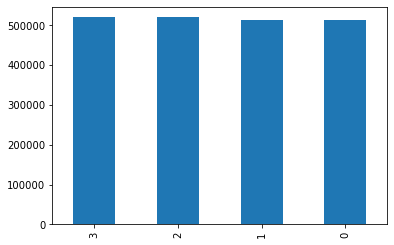

In [27]:
# examine number of dependants in this age group

single_bar = df_cust4['num_of_dependants'].value_counts().plot.bar()

In [6]:
# filter on one or more dependants

df_cust5 = df_cust4.loc[df_cust['num_of_dependants'] >= 1]

In [29]:
#top 100 rows of young families with 1 or more dependants

df_cust5.head(100)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,...,state,age,date_joined,num_of_dependants,family_status,income,_merge,region,activity_flag,spent
524,13176,Bag of Organic Bananas,24,4,10.3,156520,825,6,0,22,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,61.8
529,30633,Veggie Cheese & Pretzel Snack Pac Prepacked,50,19,2.7,2421542,825,5,0,22,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,13.5
532,31651,Extra Fancy Unsalted Mixed Nuts,117,19,3.4,2015258,825,9,1,16,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,30.6
536,40939,Drinking Water,115,7,1.6,2724496,825,7,5,14,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,11.2
537,40939,Drinking Water,115,7,1.6,889004,825,8,2,18,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,12.8
542,47402,Fuji Apples,24,4,7.1,156520,825,6,0,22,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,42.6
543,47402,Fuji Apples,24,4,7.1,2724496,825,7,5,14,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,south_region,active,49.7
635,1,Chocolate Sandwich Cookies,61,19,5.8,1727826,1480,38,4,13,...,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both,south_region,active,220.4
647,196,Soda,77,7,9.0,3344279,1480,26,3,11,...,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both,south_region,active,234.0
656,5258,Sparkling Water,115,7,1.1,2654683,1480,8,2,10,...,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both,south_region,active,8.8


In [31]:
# size of <=35, >= 1 dependants dataframe

df_cust5.shape

(1554786, 37)

In [11]:
# Import visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Department id bar graph

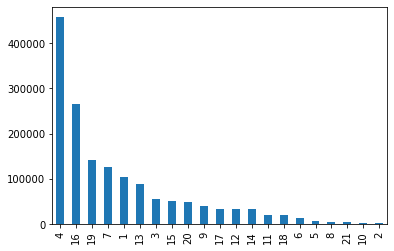

In [32]:
#bar graph on department id

yng_fam_bar = df_cust5['department_id'].value_counts().plot.bar()

### When 'age' is filtered on <= 35 and 'num_of_dependants' is filtered on >=1, the most frequent 'department_id' counts over 10k are 4, 16, 19, 7, 1, and 13.  These ids correspond to produce, dairy/eggs, snacks, beverages (non-alcoholic), frozen and pantry, respectively.

In [33]:
# Export bar graph as png file

yng_fam_bar.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'yng_fam_bar.png'))

### Expenditures by age

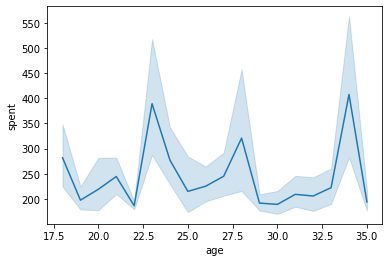

In [44]:
# line chart based on age and expenditures

yng_fam_age_line = sns.lineplot(data = df_cust5, x = 'age', y = 'spent')

### Highest expenditures for this demographic were people in their middle thirties (age 34), followed by people in their early twenties (age 23), and late twenties (age 28).

In [45]:
# export line graph as a png file

yng_fam_age_line.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'yng_fam_age_line.png'))

### Income by age

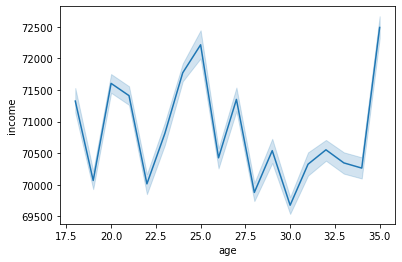

In [43]:
# line graph of income by age

yng_fam_inc_line = sns.lineplot(data = df_cust5, x = 'age', y = 'income')

### Expenditures by time of day

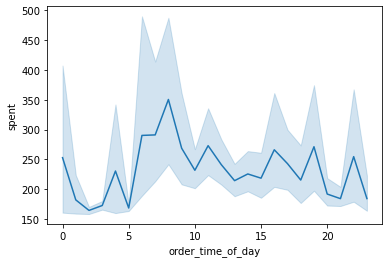

In [34]:
# line graph of expenditures by time of day

yng_fam_line = sns.lineplot(data = df_cust5, x = 'order_time_of_day', y = 'spent')

### Spending for this group picks up sharply around 6 (24 hour clock), peaks around 8 and then fluctuates with lower peaks around 11, 16, 20 and 22, and midnight.

In [35]:
# export line graph as a png file

yng_fam_line.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'yng_fam_line.png'))

### Orders by time of day

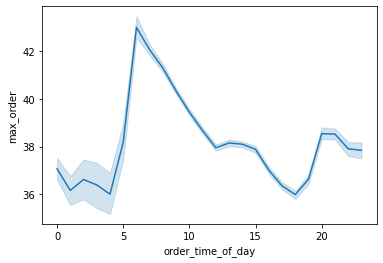

In [36]:
# line graph of max orders by time of day

yng_fam_line2 = sns.lineplot(data = df_cust5, x = 'order_time_of_day', y = 'max_order')

### Max orders for this group begins to climb between 5-7 and has its highest peak around 7, and declines steadily afterward, with a smaller peak from 11-15, and again between 20 and midnight.

In [37]:
# export line graph as a png file

yng_fam_line2.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'yng_fam_line2.png'))

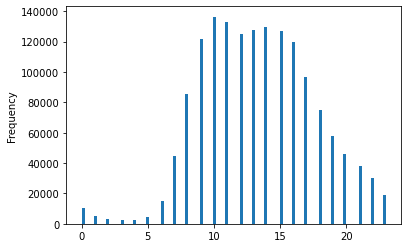

In [38]:
# histogram of frequency of orders by time of day

tod_yng_fam_hist = df_cust5['order_time_of_day'].plot.hist(bins = 100)

### Orders time of day peaks around 10, which mirrors the larger Instacart group.

In [39]:
#export histogram as a png file

tod_yng_fam_hist.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'tod_yng_fam_hist.png'))

### Orders by day of the week

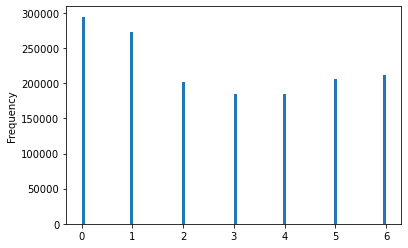

In [40]:
# histogram of frequency of orders by day of week

dow_yng_fam_hist = df_cust5['orders_day_of_week'].plot.hist(bins = 100)

### The most orders for this demographic occur on Saturday (0) and Sunday (1).

In [41]:
#export histogram as a png file

dow_yng_fam_hist.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'dow_yng_fam_hist.png'))

### Expenditures by region

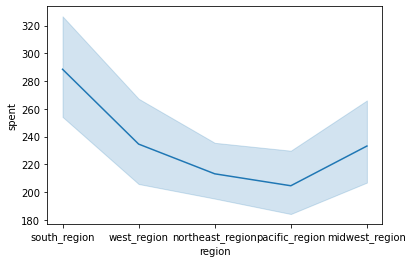

In [12]:
# line graph of expenditures by region

yng_fam_spend_line = sns.lineplot(data = df_cust5, x = 'region', y = 'spent')

### Expenditures for this demographic were the largest in the south region. The pacific region had the least expenditures.

In [13]:
# export region as phg file

yng_fam_spend_line.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'yng_fam_region_line.png'))

### Loyalty bar graph young families

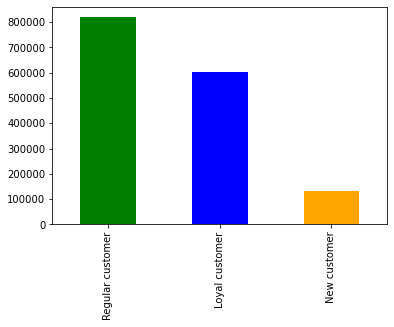

In [7]:
# loyal flag bar graph for the young families sample

loyal_bar = df_cust5['loyalty_flag'].value_counts().plot.bar(color =['green', 'blue', 'orange'])

In [9]:
# export bar graph to png file

loyal_bar.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'loyal_bar_yng_fam.png'))

### Price range bar graph

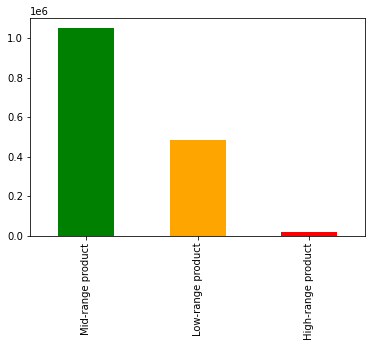

In [14]:
# create price range bar chart

price_rng_bar = df_cust5['price_range_loc'].value_counts().plot.bar(color =['green', 'orange', 'red'])

In [16]:
df_cust5['price_range_loc'].value_counts(dropna = False)

Mid-range product     1049032
Low-range product      485772
High-range product      19982
Name: price_range_loc, dtype: int64

### Products in the mid-range were the most frequent purchases.

In [15]:
# export bar graph to png file

price_rng_bar.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'price_rng_yng_fam.png'))

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [9]:
### aggregate based on order number by young parents

df_cust5.groupby('department_id').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                      mean min max
department_id                     
1                20.183783   5  99
2                22.585380   5  99
3                21.790849   5  99
4                22.521429   5  99
5                21.424313   5  99
6                21.604631   5  99
7                21.842408   5  99
8                20.291848   5  99
9                20.814502   5  99
10               25.580412   5  99
11               20.979410   5  99
12               20.700904   5  99
13               21.611759   5  99
14               21.578815   5  99
15               21.057266   5  99
16               22.348894   5  99
17               20.417020   5  99
18               23.648158   5  99
19               21.916965   5  99
20               21.355385   5  99
21               27.041248   5  99

In [10]:
### aggregate based on order number by young parents

df_cust5.groupby('department_id').agg({'spent': ['mean', 'min', 'max']})

spent                 
                     mean   min        max
department_id                             
1              154.565558   5.0     1460.2
2              150.871730   6.0     1254.0
3              171.522299   5.0     1450.4
4              179.224608   5.0     1485.0
5              178.699190   5.0     1485.0
6              164.302752   5.5     1381.8
7              168.527482   5.0     1470.0
8              159.457454   5.5     1209.0
9              152.847613   5.0     1470.0
10             211.341625   8.4     1264.2
11             168.310876   5.0     1450.4
12             337.150897  40.5     2371.6
13             174.544553   5.0     1880.0
14             173.639468   5.0     1445.4
15             159.842718   5.0     1425.9
16             627.995293   5.0  3699963.0
17             149.099815   5.0     1450.4
18             180.272684   5.5     1445.4
19              93.650998   8.0      693.0
20             166.777413   5.0     1465.2
21             229.547673   6.5     1366.2

## 8. Export sample containing customers <= 35, >= 1 dependants

In [46]:
# Emport as a pickle file
df_cust5.to_pickle(os.path.join(path, '02_Data','Prepared_Data', 'cop_sample_yng_fam.pkl'))

In [47]:
# Export as a CSV file
df_cust5.to_csv(os.path.join(path, '02_Data','Prepared_Data', 'CSV_files','yng_fam_single.csv'))